In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load rat data
rat_data = pd.read_csv('input_rat.csv')

# Load human data
human_data = pd.read_csv('output_human.csv')

# Assuming 'Medicine' is a common column between both datasets
common_medicines = set(rat_data['Drugs']) & set(human_data['Drugs'])

# Select rows with common medicines
rat_data_common = rat_data[rat_data['Drugs'].isin(common_medicines)]
human_data_common = human_data[human_data['Drugs'].isin(common_medicines)]

# Set 'Medicine' column as index for both datasets
rat_data_common.set_index('Drugs', inplace=True)
human_data_common.set_index('Drugs', inplace=True)


In [4]:
# Split the data into training and testing sets
X_rat_train, X_rat_test, y_human_train, y_human_test = train_test_split(rat_data_common, human_data_common, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_rat_train, y_human_train)

# Make predictions on the test set
predictions = model.predict(X_rat_test)

In [5]:
# Evaluate the model
mse = mean_squared_error(y_human_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.353046564555493


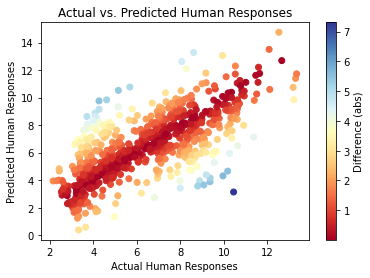

In [6]:
# Flatten both arrays
y_human_test_flat = y_human_test.values.flatten()
predictions_flat = predictions.flatten()

## Determine colors based on the difference between actual and predicted values
colors = np.abs(y_human_test_flat - predictions_flat)

# Plotting with colormap
scatter = plt.scatter(y_human_test_flat, predictions_flat, c=colors, cmap=plt.cm.RdYlBu)
plt.xlabel("Actual Human Responses")
plt.ylabel("Predicted Human Responses")
plt.title("Actual vs. Predicted Human Responses")
plt.colorbar(scatter, label='Difference (abs)')

plt.show()

